## NASA: Astronomy Picture of the Day (APOD)
NASA releases a lot of data to the general public, including an Astronomy Picture of the Day (APOD). To get the picture I need to issue an HTTP GET request and parse the JSON that is returned. 

### APOD: Current Day

<div class="alert alert-block alert-success">
<b>Installation - requests</b> <br>
    pip install requests 
</div>

In [1]:
import requests

Using the requests package is very easy.

For example, NASA gives us an example URL with a demo security key that can be used to query the APOD interface. Generally speaking, the creator of an API will require individuals to register and receive their own credentials to use their API. Given the popularity of the APOD API, NASA has provided the public with a guest credential, 'DEMO_KEY' to view 30 images (based on ip address) each day. of 'DEMO_KEY'.

In [2]:
import datetime

now = datetime.datetime.now()

# building and sending our request
apiKey = {'api_key':'DEMO_KEY', 'date':now.date()}

# storing the results in a variable
result =  requests.get('https://api.nasa.gov/planetary/apod',params=apiKey)

The response that was returned from our request has specific attributes associated with it. Based on the documentation for APOD, the response will return the requesting url that was used. To look at the URL that was used in the original request.

In [3]:
print(result.url)

https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY&date=2020-11-06


To look at the entire text of the response that was returned from our request.

In [4]:
print(result.text)

{"copyright":"Derek Demeter","date":"2020-11-06","explanation":"Completing one orbit of our fair planet in 90 minutes the International Space Station can easily be spotted by eye as a very bright star moving through the night sky. Have you seen it? The next time you do, you will have recognized the location of over 20 years of continuous human presence in space. In fact, the Expedition 1 crew to the ISS docked with the orbital outpost some 400 kilometers above the Earth on November 2, 2000. No telescope is required to spot the ISS flashing through the night. But this telescopic field of view does reveal remarkable details of the space station captured as it transited the waning gibbous moon on November 3, just one day after the space age milestone. The well-timed telescopic snapshot also contains the location of another inspirational human achievement. About 400,000 kilometers away, the Apollo 11 landing site on the dark, smooth lunar Sea of Tranquility is to the right of the ISS silho

That's a bit messy and hard to read. Remember from above, we know that the response is JSON. Fortunately for us, JSON data can go straight into a dictionary. Requests can handle JSON data by calling json() function.

In [5]:
dict_current = result.json()

Let's get a list of all the keys in our JSON dictionary.

In [6]:
dict_current.keys()

dict_keys(['copyright', 'date', 'explanation', 'hdurl', 'media_type', 'service_version', 'title', 'url'])

Let's try to access several of the keys within our dictionary.

In [7]:
dict_current['date']

'2020-11-06'

In [8]:
dict_current['explanation']

'Completing one orbit of our fair planet in 90 minutes the International Space Station can easily be spotted by eye as a very bright star moving through the night sky. Have you seen it? The next time you do, you will have recognized the location of over 20 years of continuous human presence in space. In fact, the Expedition 1 crew to the ISS docked with the orbital outpost some 400 kilometers above the Earth on November 2, 2000. No telescope is required to spot the ISS flashing through the night. But this telescopic field of view does reveal remarkable details of the space station captured as it transited the waning gibbous moon on November 3, just one day after the space age milestone. The well-timed telescopic snapshot also contains the location of another inspirational human achievement. About 400,000 kilometers away, the Apollo 11 landing site on the dark, smooth lunar Sea of Tranquility is to the right of the ISS silhouette.'

So far so good, but we still haven't seen a picture. One would assume that "Picture of the Day" would have an actual picture associated with the data. 

After consulting the documentation for the APOD API on (https://github.com/nasa/apod-api/blob/master/README.md), we are able to determine that 'url' contains a link to the APOD.

In [9]:
dict_current['url']

'https://apod.nasa.gov/apod/image/2011/ISSlunartransit110320closeup1024.jpg'

Time to actually view the picture. Notice that this url is pointing to a jpg image. Luckily for us, we have already seen how to view a jpg images during this course.

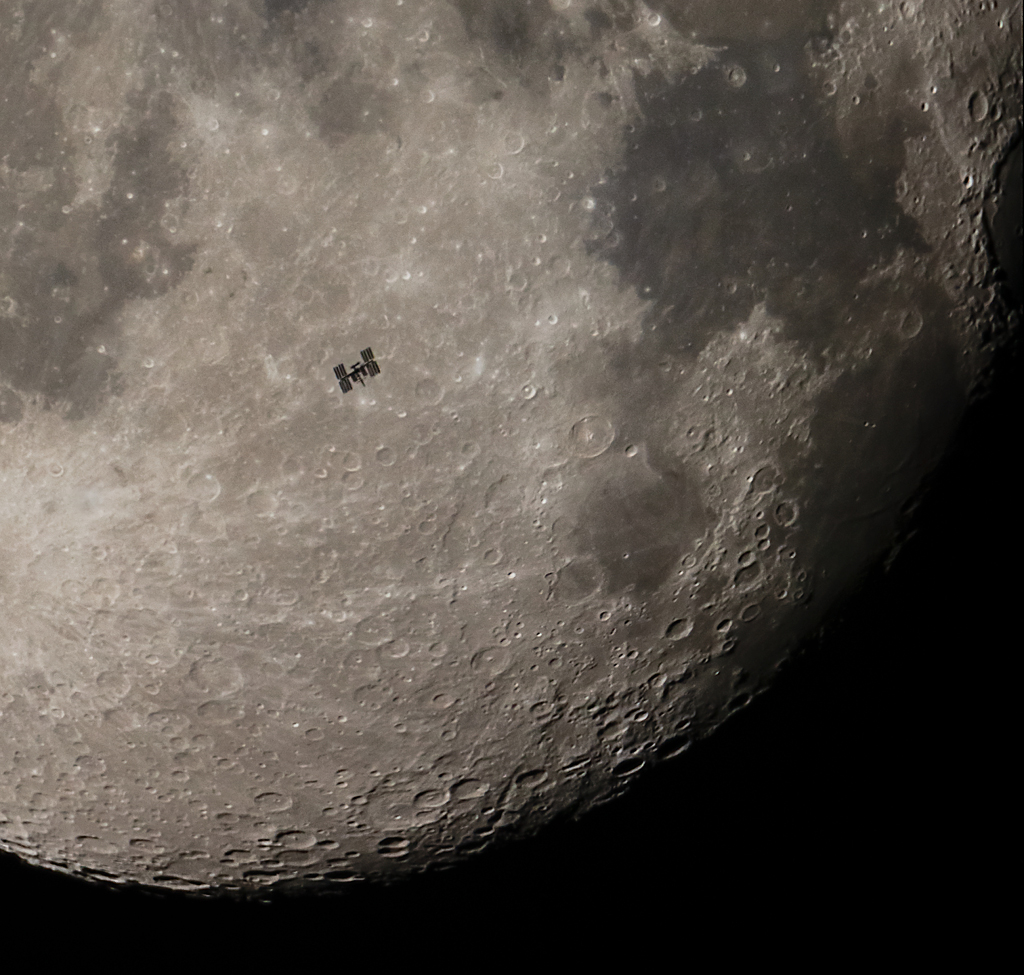

In [10]:
from IPython.display import Image

Image(dict_current['url'])

### APOD: Specific Day

By changing the values that we used in our original request, we should be able to view a APOD for a specific date.

The documentation on NASA's API page (https://api.nasa.gov/) details the query parameters for the APOD API.

Let's try using the datetime package within python and the above information to get different pictures.

In [11]:
import datetime
now = datetime.datetime.now()
print(now.date())

2020-11-06


To get a different day/week/month, etc. we can use the timedelta() function:

In [12]:
yesterday = now - datetime.timedelta(days = 1)
print(yesterday.date())

2020-11-05


So, to get yesterday's picture:

In [13]:
# using a dictionary for the query parameters
data = {'api_key':'DEMO_KEY', 'date':yesterday.date()}
data

{'api_key': 'DEMO_KEY', 'date': datetime.date(2020, 11, 5)}

In [14]:
# using the paramas argument in our request
result =  requests.get('https://api.nasa.gov/planetary/apod',params=data)

# create a dictionary for yesterday's picture
dict_yesterday = result.json()

# verify the date
print(dict_yesterday['date'])

2020-11-05


Viewing yesterday's picture

In [15]:
dict_yesterday['url']

'https://apod.nasa.gov/apod/image/2011/M78_LDN1622_BarnardsLoop_SEP27_28_Oct15_final1024.jpg'

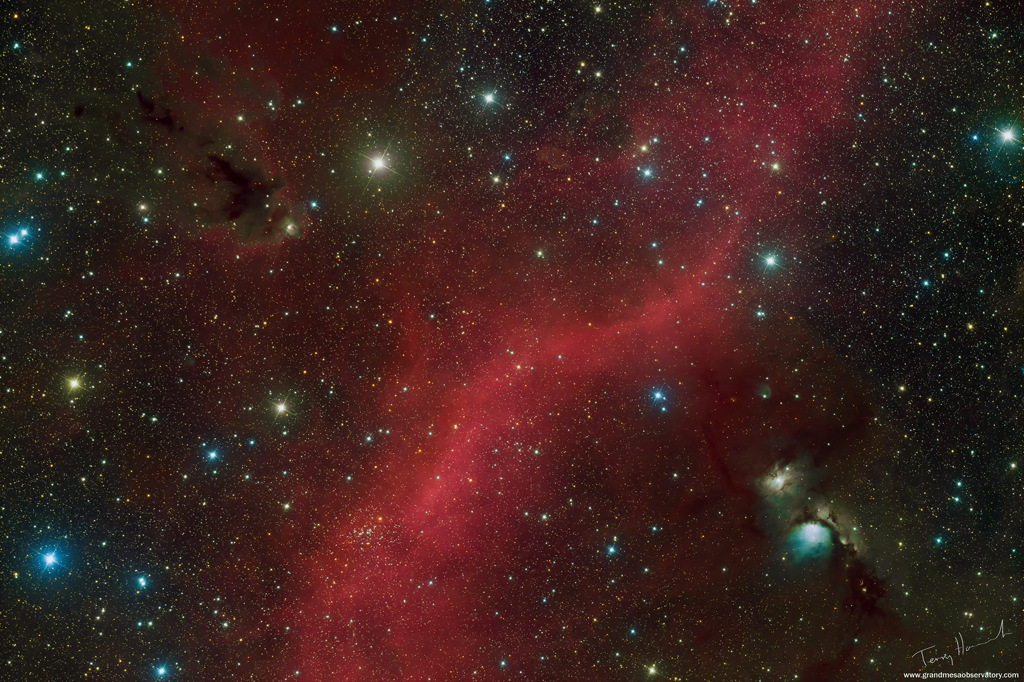

In [16]:
Image(dict_yesterday['url'])

Okay, one more, how about we get the picture from a specific date. Let's use Jan 03, 2020.

<div class="alert alert-block alert-warning">
<b>Note:</b> There are some dates that do not have a APOD, if the date you choose isn't available NASA will return the APOD for the current date. https://apod.nasa.gov/apod/archivepix.html has a list of the dates with available pictures.
</div>

We need to make a <strong>date</strong> object to pass to the APOD API.

In [17]:
# datetime format is yyyy-mm-dd
my_date = datetime.date(int('2020'),int('01'),int('03'))
my_date

datetime.date(2020, 1, 3)

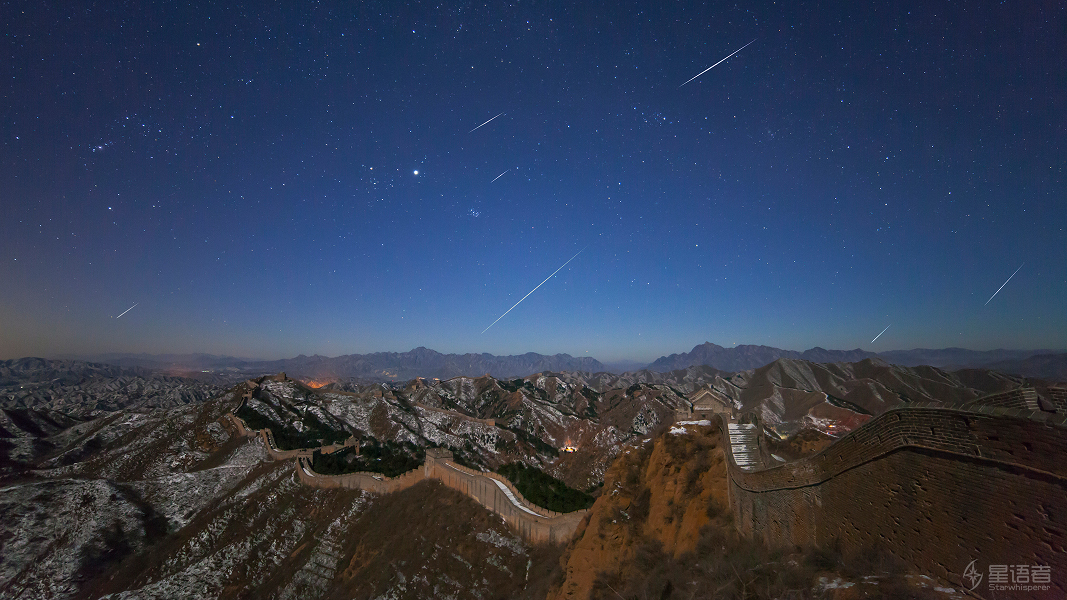

In [18]:
# same process as above
data = {'api_key':'DEMO_KEY', 'date': my_date}
results =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
dict_my_date = results.json()
Image(dict_my_date['url'])

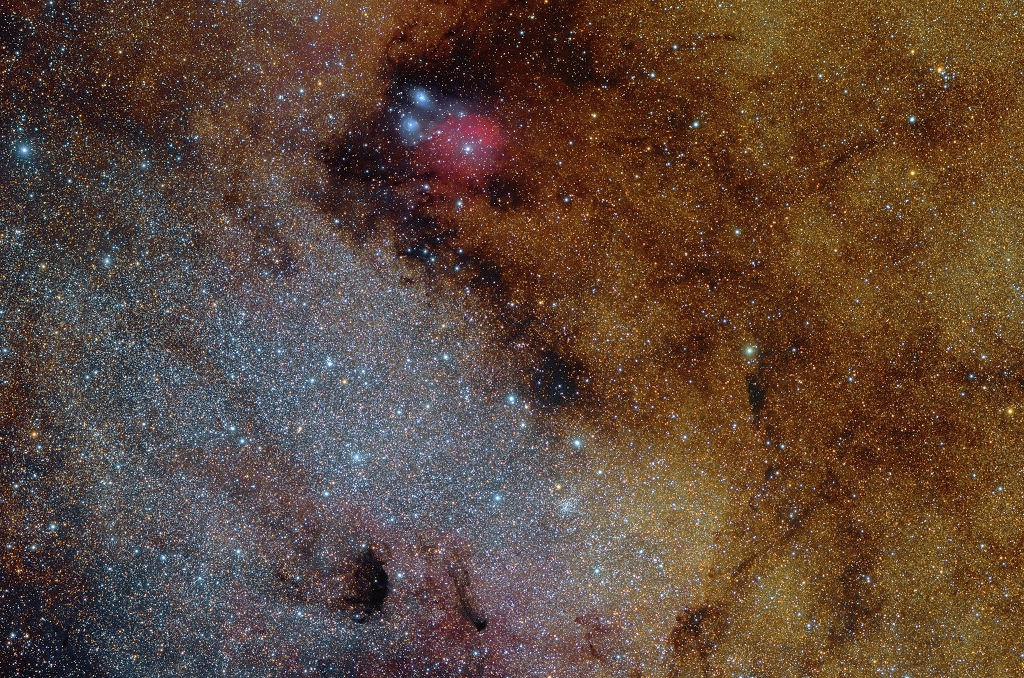

In [19]:
new_date = datetime.date(int('2018'),int('06'),int('29'))

# same process as above
data = {'api_key':'DEMO_KEY', 'date': new_date}
results =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
dict_new_date = results.json()
Image(dict_new_date['url'])